In [1]:
import pandas as pd
import sklearn as sk
import plotly as py
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from plotly import graph_objects as go

In [2]:
df_paciente = pd.read_csv('D:/Arquivos/Dropbox/00 - XPE/00 - Arquiteto de dados/00 - Modulo 01/03 - Desafio/01 - Dados/dados_pacientes.csv',
    sep=';',
    encoding='latin-1',
    decimal=',')
df_HeadBrain = pd.read_csv('D:/Arquivos/Dropbox/00 - XPE/00 - Arquiteto de dados/00 - Modulo 01/03 - Desafio/01 - Dados/dados_headbrain.csv',
    sep=';',
    encoding='latin-1',
    decimal=',')

In [3]:
df_HeadBrain.describe()

,cod_paciente,Head Size(cm^3),Brain Weight(grams)
count,319.000000,319.000000,319.000000
mean,121.755486,3642.238245,1281.996865
std,65.268120,351.124447,117.665246
min,1.000000,2720.000000,955.000000
25%,75.500000,3394.000000,1209.000000
50%,115.000000,3632.000000,1280.000000
75%,175.500000,3876.000000,1350.000000
max,237.000000,4747.000000,1635.000000


In [4]:
df_HeadBrain.head()

,cod_paciente,genero,Head Size(cm^3),Brain Weight(grams)
0,1,Masculino,4512,1530
1,2,Masculino,3738,1297
2,3,Masculino,4261,1335
3,4,Masculino,3777,1282
4,5,Masculino,4177,1590


In [5]:
df_paciente.rename(columns = {"ï»¿id_cliente": "cod_paciente"}, inplace = True)
df_paciente.describe()

,cod_paciente,idade,id_estado,qtde_filhos,salario
count,7999.000000,7999.000000,7999.000000,7989.000000,7999.000000
mean,4000.000000,38.477060,14.094012,2.405432,3169.312664
std,2309.256735,13.568667,7.821634,1.703916,3055.862493
min,1.000000,17.000000,1.000000,0.000000,0.000000
25%,2000.500000,28.000000,7.000000,1.000000,1100.000000
50%,4000.000000,37.000000,14.000000,2.000000,2410.000000
75%,5999.500000,47.000000,21.000000,4.000000,3640.500000
max,7999.000000,90.000000,27.000000,5.000000,19994.000000


In [6]:
df_paciente.head()

,cod_paciente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor PÃºblico,Ensino MÃ©dio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,AutÃ´nomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,15,Casado,Negro,0.0,3430


In [7]:
#Verifica se há dados em branco
missing_data_HeadBrain = df_HeadBrain.isna().sum().sum()
missing_data_Paciente = df_paciente.isna().sum().sum()
# Print dos resultados da verificação de dados em branco.
if missing_data_HeadBrain >0:
  print(f"O Dataset Head Brain possui {missing_data_HeadBrain} em branco")
else:
  print("O Dataset Head Brain não possui informações em branco")


print("--------------")

if missing_data_Paciente >0:
  print(f"O Dataset Paciente possui {missing_data_Paciente} em branco")
  print(df_paciente.isna().sum())
else:
  print("O Dataset Paciente não possui informações em branco")




O Dataset Head Brain não possui informações em branco
--------------
O Dataset Paciente possui 397 em branco
cod_paciente         0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos         10
salario              0
dtype: int64


<Axes: >

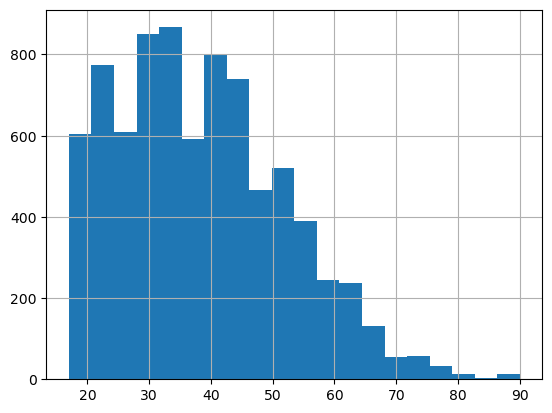

In [8]:
df_paciente['idade'].hist(bins=20)

In [9]:
# Verificar Duplicados
df_subset = []
print(df_subset)
colunas_verificadas = ["cod_paciente"]
df_subset = df_paciente[colunas_verificadas]

# Busca por duplicados nas colunas selecionadas
duplicados = df_subset[df_subset.duplicated()]

# Printa a quantidade de linhas duplicadas
print(f"Quantidade de linhas duplicadas: {len(duplicados)}")

# Printa os valores duplicados
print(duplicados)

[]
Quantidade de linhas duplicadas: 0
Empty DataFrame
Columns: [cod_paciente]
Index: []


In [10]:
# Verificar Duplicados
df_subset = []
print(df_subset)
colunas_verificadas = ["cod_paciente", "genero", 	"Head Size(cm^3)", 	"Brain Weight(grams)"]
df_subset = df_HeadBrain[colunas_verificadas]

# Busca por duplicados nas colunas selecionadas
duplicados = df_subset[df_subset.duplicated()]

# Printa a quantidade de linhas duplicadas
print(f"Quantidade de linhas duplicadas: {len(duplicados)}")

# Printa os valores duplicados
print(duplicados)

[]
Quantidade de linhas duplicadas: 82
     cod_paciente     genero  Head Size(cm^3)  Brain Weight(grams)
237            71  Masculino             4008                 1468
238            72  Masculino             3858                 1390
239            73  Masculino             4121                 1380
240            74  Masculino             4057                 1432
241            75  Masculino             3824                 1240
..            ...        ...              ...                  ...
314           231   Feminino             3685                 1350
315           232   Feminino             3704                 1220
316           233   Feminino             3214                 1110
317           234   Feminino             3394                 1215
318           235   Feminino             3233                 1104

[82 rows x 4 columns]


In [11]:
# Excluir linhas duplicadas
df_HeadBrain = df_subset.drop_duplicates()

# Print quantidade de linhas duplicadas
print(f"Numero de linhas mantidas após a exclusão dos duplicados: {len(df_HeadBrain)}")

# Print as primeiras linhas excluidas
print(df_HeadBrain.head())
df_HeadBrain

Numero de linhas mantidas após a exclusão dos duplicados: 237
   cod_paciente     genero  Head Size(cm^3)  Brain Weight(grams)
0             1  Masculino             4512                 1530
1             2  Masculino             3738                 1297
2             3  Masculino             4261                 1335
3             4  Masculino             3777                 1282
4             5  Masculino             4177                 1590


,cod_paciente,genero,Head Size(cm^3),Brain Weight(grams)
0,1,Masculino,4512,1530
1,2,Masculino,3738,1297
2,3,Masculino,4261,1335
3,4,Masculino,3777,1282
4,5,Masculino,4177,1590
...,...,...,...,...
232,233,Feminino,3214,1110
233,234,Feminino,3394,1215
234,235,Feminino,3233,1104
235,236,Feminino,3352,1170


In [12]:
# Combinando as consultas
#df_combined = df_paciente.set_index("cod_paciente").join(df_HeadBrain.set_index("cod_paciente"), how="left")
df_combined = pd.merge(df_HeadBrain, df_paciente, on="cod_paciente", how="left")

In [13]:
df_combined


,cod_paciente,genero,Head Size(cm^3),Brain Weight(grams),idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,Masculino,4512,1530,39,Servidor PÃºblico,Ensino MÃ©dio Completo,2,Solteiro,Branco,2.0,4754
1,2,Masculino,3738,1297,50,AutÃ´nomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,Masculino,4261,1335,38,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,Masculino,3777,1282,53,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,24,Casado,Negro,1.0,1100
4,5,Masculino,4177,1590,28,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,15,Casado,Negro,0.0,3430
...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,Feminino,3214,1110,33,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,16,Divorciado,Amarelo,0.0,3565
233,234,Feminino,3394,1215,28,FuncionÃ¡rio Setor Privado,Mestrado,26,Solteiro,Branco,NaN,10671
234,235,Feminino,3233,1104,59,Servidor PÃºblico,Ensino MÃ©dio Incompleto,26,Casado,Branco,1.0,1964
235,236,Feminino,3352,1170,40,Servidor PÃºblico,Ensino MÃ©dio Completo,7,Solteiro,Branco,1.0,3951


In [14]:
missing_data_combined= df_combined.isna().sum().sum()
# Print dos resultados da verificação de dados em branco.
if missing_data_HeadBrain >0:
  print(f"O Dataset Head Brain possui {missing_data_combined} em branco")
else:
  print("O Dataset Head Brain não possui informações em branco")

O Dataset Head Brain não possui informações em branco


<Axes: >

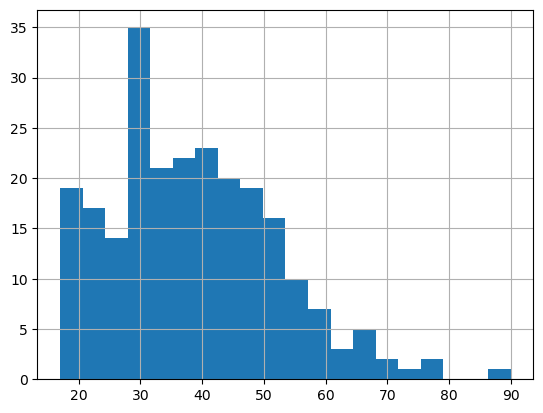

In [15]:
df_combined['idade'].hist(bins=20)

In [16]:
# Questão 3 substitui os valores e aplica a média da coluna no mesmo dataset

teste = df_combined

# Quando 'inplace = False' o dataset original não é modificado e é gerado um novo datafreme

Teste_novo = teste['qtde_filhos'].fillna(round(teste['qtde_filhos'].mean(),2), inplace = False)

missing_data_teste = teste['qtde_filhos'].isna().sum().sum()

missing_data_teste_novo = Teste_novo.isna().sum().sum()

print("inplace = false")

print(f"Verifica a quantidade de vazios no dataset original apos o fillna com inplace = False, {missing_data_teste} ainda vazios")

print(f"O novo dataset gerado possui {missing_data_teste_novo} dados vazios")

print("-------------------")

# Quando 'inplace = True' o dataset original é modificado.

print("inplace = true")



teste['qtde_filhos'].fillna(round(teste['qtde_filhos'].mean(),2), inplace = True)

missing_data_teste = teste['qtde_filhos'].isna().sum().sum()

print(f"Agora, verifica a quantidade de vazios no dataset original apos o fillna com inplace = True, {missing_data_teste} vazios")


#se rodar de novo, o dataset original vai retornar 0 nos dois resultados, pois o dataset original foi alterado




inplace = false
Verifica a quantidade de vazios no dataset original apos o fillna com inplace = False, 4 ainda vazios
O novo dataset gerado possui 0 dados vazios
-------------------
inplace = true
Agora, verifica a quantidade de vazios no dataset original apos o fillna com inplace = True, 0 vazios


In [17]:
#from sklearn.preprocessing import StandardScaler
df_head = df_HeadBrain.iloc[:,[2,3]].values
df_head
#normaliza_df = StandardScaler()
#df_HeadBrain_norm = normaliza_df.fit_transform(df_head)
df_HeadBrain_norm=df_head
df_head

array([[4512, 1530],
       [3738, 1297],
       [4261, 1335],
       [3777, 1282],
       [4177, 1590],
       [3585, 1300],
       [3785, 1400],
       [3559, 1255],
       [3613, 1355],
       [3982, 1375],
       [3443, 1340],
       [3993, 1380],
       [3640, 1355],
       [4208, 1522],
       [3832, 1208],
       [3876, 1405],
       [3497, 1358],
       [3466, 1292],
       [3095, 1340],
       [4424, 1400],
       [3878, 1357],
       [4046, 1287],
       [3804, 1275],
       [3710, 1270],
       [4747, 1635],
       [4423, 1505],
       [4036, 1490],
       [4022, 1485],
       [3454, 1310],
       [4175, 1420],
       [3787, 1318],
       [3796, 1432],
       [4103, 1364],
       [4161, 1405],
       [4158, 1432],
       [3814, 1207],
       [3527, 1375],
       [3748, 1350],
       [3334, 1236],
       [3492, 1250],
       [3962, 1350],
       [3505, 1320],
       [4315, 1525],
       [3804, 1570],
       [3863, 1340],
       [4034, 1422],
       [4308, 1506],
       [3165,

In [18]:


df_HeadBrain_corrigido = df_HeadBrain_norm
#df_HeadBrain_corrigido["genero"] = df_HeadBrain_corrigido["genero"].replace({"Masculino": 0, "Feminino": 1})

# Create a list of WCSS values
wcss_head = []

# Loop through a range of cluster numbers
for i in range(1, 11):
  # Create a KMeans model with the current cluster number
  kmeans_head = KMeans(n_clusters=i, random_state=0)

  # Fit the model to the data
  kmeans_head.fit(df_HeadBrain_corrigido)

  # Append the WCSS value to the list
  wcss_head.append(kmeans_head.inertia_)


i:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
i:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
i:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
i:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THRE

In [19]:
#Visualizando os valores de wcss
for i in range(len(wcss_head)):
  print('Cluster:', i, " - valor do wcss", wcss_head[i])


Cluster: 0  - valor do wcss 34903864.18565401
Cluster: 1  - valor do wcss 12994263.40947717
Cluster: 2  - valor do wcss 7402867.843870258
Cluster: 3  - valor do wcss 4948479.069395583
Cluster: 4  - valor do wcss 3591427.8050726494
Cluster: 5  - valor do wcss 2945421.0165694086
Cluster: 6  - valor do wcss 2427060.557155792
Cluster: 7  - valor do wcss 2091192.9499842415
Cluster: 8  - valor do wcss 1855091.3936831953
Cluster: 9  - valor do wcss 1693029.8596479564


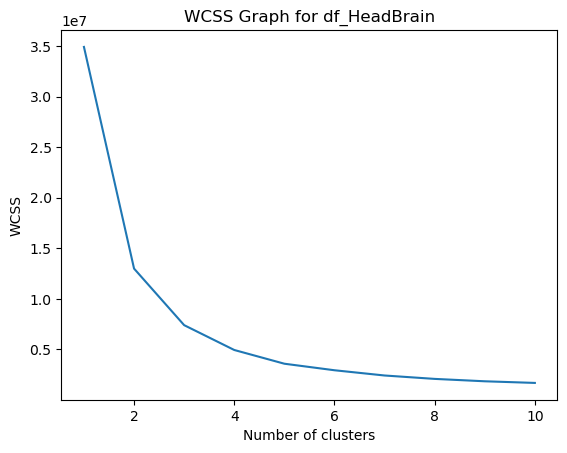

In [20]:
/#criando grafipo para visualização
plt.plot(range(1, 11), wcss_head)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("WCSS Graph for df_HeadBrain")

plt.show()

grafico_wcss_head = px.line(x= range(1,11), y=wcss_head)
grafico_wcss_head.show()

In [21]:
#Resposta da pergunda 4
print("WCSS for 3 clusters:", (wcss_head[2]/1000000))


WCSS for 3 clusters: 7.402867843870258


In [22]:
#X_std = StandardScaler().fit_transform(df_HeadBrain_corrigido)

# Run local implementation of kmeans
#km = KMeans(n_clusters=3, random_state=0)
#km.fit(X_std)
#centroids = km.cluster_centers_


kmeans_head2 = KMeans(n_clusters=3, random_state=42)
label_cluster_head = kmeans_head2.fit_predict(df_HeadBrain_corrigido)


i:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

i:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [23]:
#verifica a classificação dos clusters
label_cluster_head

array([2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1,
       1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0,
       0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [24]:
#Verifica os centroides do Kmeans
centroide_head = kmeans_head2.cluster_centers_
centroide_head

array([[3248.15      , 1170.075     ],
       [3680.40186916, 1305.43925234],
       [4152.02      , 1415.06      ]])

In [25]:
#Transforma o array em tabela
df_centroid_head = pd.DataFrame(centroide_head)
df_centroid_head

,0,1
0,3248.150000,1170.075000
1,3680.401869,1305.439252
2,4152.020000,1415.060000


In [26]:
df_cent = df_centroid_head
df_cent.rename(columns = {0: "x", 1: "y"}, inplace = True)
df_cent

,x,y
0,3248.150000,1170.075000
1,3680.401869,1305.439252
2,4152.020000,1415.060000


In [27]:
grafico_Head = px.scatter(x = df_HeadBrain_corrigido[:,0], y = df_HeadBrain_corrigido[:,1], color = label_cluster_head )
grafico_Head.show()
fig = px.scatter(x=df_cent["x"], y=df_cent["y"], size= [7,7,7])
fig.show()

In [28]:

graf_fin = go.Figure(data = grafico_Head.data + fig.data)
graf_fin.show()

In [29]:
#Preparação para a Pergunta 6
df_Label = pd.DataFrame(label_cluster_head)
df_Label.rename(columns = {'': "cod_paciente", 0: "Cluster"}, inplace = True)
df_Label.insert(0, 'cod_paciente', range(1, len(df_Label)+1))
df_Label

,cod_paciente,Cluster
0,1,2
1,2,1
2,3,2
3,4,1
4,5,2
...,...,...
232,233,0
233,234,0
234,235,0
235,236,0


In [30]:
df_merge = pd.merge(df_combined, df_Label, on="cod_paciente", how="left")
df_merge


,cod_paciente,genero,Head Size(cm^3),Brain Weight(grams),idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,Cluster
0,1,Masculino,4512,1530,39,Servidor PÃºblico,Ensino MÃ©dio Completo,2,Solteiro,Branco,2.00,4754,2
1,2,Masculino,3738,1297,50,AutÃ´nomo,Superior Incompleto,24,Casado,Branco,1.00,3923,1
2,3,Masculino,4261,1335,38,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,4,Divorciado,Branco,0.00,1100,2
3,4,Masculino,3777,1282,53,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,24,Casado,Negro,1.00,1100,1
4,5,Masculino,4177,1590,28,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,15,Casado,Negro,0.00,3430,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,Feminino,3214,1110,33,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,16,Divorciado,Amarelo,0.00,3565,0
233,234,Feminino,3394,1215,28,FuncionÃ¡rio Setor Privado,Mestrado,26,Solteiro,Branco,2.41,10671,0
234,235,Feminino,3233,1104,59,Servidor PÃºblico,Ensino MÃ©dio Incompleto,26,Casado,Branco,1.00,1964,0
235,236,Feminino,3352,1170,40,Servidor PÃºblico,Ensino MÃ©dio Completo,7,Solteiro,Branco,1.00,3951,0


In [31]:
df_merge.groupby("Cluster")["Head Size(cm^3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,80.0,3248.150000,168.631206,2720.0,3157.5,3281.5,3389.5,3490.0
1,107.0,3680.401869,134.637519,3443.0,3571.0,3669.0,3794.5,3930.0
2,50.0,4152.020000,189.529115,3876.0,4009.0,4108.5,4259.0,4747.0


In [32]:
#Quantidade de Indivíduos por grupos
fig = px.histogram(df_merge, x="Cluster", nbins=10)
fig.show()


#Média do tamanho da cabeça por grupo
fig2 = px.box(df_merge, x="Cluster", y="Head Size(cm^3)")
fig2.show()


In [33]:
# Questões


In [34]:
# Resposta da Pergunta 7
correlacao = df_merge["Head Size(cm^3)"].corr(df_merge["Brain Weight(grams)"])

# Printar a correlação entre as variaveis
print(f"A correlação entre o tamanho da cabeça e o peso do cérebro é de: {correlacao}")

A correlação entre o tamanho da cabeça e o peso do cérebro é de: 0.7995697092542962


In [35]:
# Resposta da Pergunta 8
qtd_feminino_by_cluster = df_merge.groupby("Cluster")["genero"].agg(lambda x: (x == "Feminino").sum())

print(f"A quantidade de pessoas do gênero feminino no cluster de tamanho pequeno é: {qtd_feminino_by_cluster[0]} indivíduos")


A quantidade de pessoas do gênero feminino no cluster de tamanho pequeno é: 60 indivíduos


In [36]:
# Resposta da Pergunta 9
qtd_masculino_by_cluster = df_merge.groupby("Cluster")["genero"].agg(lambda x: (x == "Masculino").sum())

Maior_cluster_masculino = qtd_masculino_by_cluster.sort_values(ascending=False).index[0]

print(f"O Cluster com maior quantidade de indivíduos masculinos é: {Maior_cluster_masculino}")

O Cluster com maior quantidade de indivíduos masculinos é: 1


In [39]:
# Resposta da Pergunta 10
media_idade_cluster_grande = df_merge.groupby("Cluster")['idade'].mean()

print(f"A média de idade das pessoas do cluster de tamanho grande é de {media_idade_cluster_grande[2]}")

fig = px.box(df_merge, x="Cluster", y="idade")
fig.show()

A média de idade das pessoas do cluster de tamanho grande é de 39.08


<Axes: >

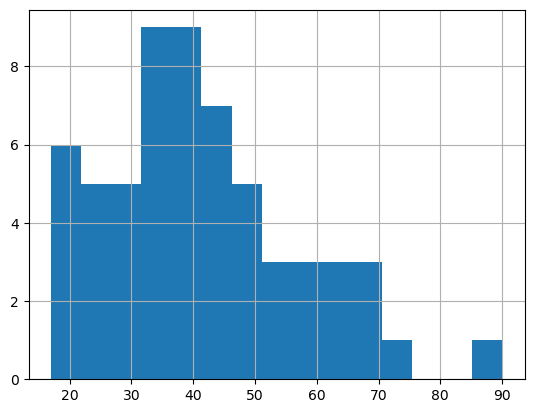

In [40]:
df_filtrado = df_merge[(df_merge["Cluster"] == 0) & (df_merge["genero"] == "Feminino")]

df_filtrado['idade'].hist(bins=15)
